In [181]:
import pandas as pd
df = pd.read_csv("hotel_reviews_sample.csv")

In [182]:
df

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35907,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-20T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Best of the Best!!!! My family and I stayed in...,Amazing time (both times!!),Charlotte,Chelsa K.,NC
35908,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-12T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Amazing Vacation in Beautiful Cabin We stayed ...,Amazing time (both times!!),Charlotte,Heather D.,NC
35909,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2015-11-03T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,My husband and I stayed at Tree Tops which is ...,Amazing time (both times!!),Charlotte,Carol W.,NC
35910,3747 29th St S E,"Hotels-Apartment,Corporate Lodging,Hotels,Lodging",Grand Rapids,US,42.909480,-85.573590,Extended Stay America Grand Rapids - Kentwood,49512,MI,NaN,2015-12-01T19:40:54Z,NaN,NaN,0.0,to share your opinion of this businesswith YP ...,NaN,NaN,write a review,NaN


In [183]:
df_reduced = df[['name', 'city', 'reviews.date', 'latitude', 'longitude', 'reviews.rating', 'reviews.text']].copy()

In [184]:
df_reduced = df_reduced[df_reduced['reviews.date'] >= '2014-01-01']
df_reduced = df_reduced[df_reduced['reviews.date'] < '2016-11-01']

In [185]:
review_counts = pd.DataFrame(df_reduced.groupby(['latitude', 'longitude'])['reviews.rating'].count()).reset_index()
review_counts = review_counts[review_counts['reviews.rating'] > 100]

In [186]:
df_reduced = df_reduced.merge(review_counts, how='inner', left_on=['latitude', 'longitude'], right_on=['latitude', 'longitude'])
df_reduced

,name,city,reviews.date,latitude,longitude,reviews.rating_x,reviews.text,reviews.rating_y
0,Best Western Plus Waterville Grand Hotel,Waterville,2015-06-17T00:00:00Z,44.570590,-69.640120,4.0,I asked for a nonsmoking room and was pleased ...,248
1,Best Western Plus Waterville Grand Hotel,Waterville,2015-11-23T00:00:00Z,44.570590,-69.640120,5.0,I always stay at this hotel when visiting my m...,248
2,Best Western Plus Waterville Grand Hotel,Waterville,2015-08-03T00:00:00Z,44.570590,-69.640120,3.0,Adequate but nothing to recommend it.,248
3,Best Western Plus Waterville Grand Hotel,Waterville,2014-08-13T00:00:00Z,44.570590,-69.640120,4.0,"Great service, comfortable hotel. Rug was wet ...",248
4,Best Western Plus Waterville Grand Hotel,Waterville,2015-07-03T00:00:00Z,44.570590,-69.640120,5.0,excellent place to stay and food was super...g...,248
...,...,...,...,...,...,...,...,...
10778,Elk Springs Resort,Gatlinburg,2016-08-01T00:00:00Z,35.754868,-83.457295,1.0,We are extremely disappointed in this company....,142
10779,Elk Springs Resort,Gatlinburg,2016-07-15T00:00:00Z,35.754868,-83.457295,5.0,"Our family of 14 stayed in a 5 bedroom cabin, ...",142
10780,Elk Springs Resort,Gatlinburg,2016-07-06T00:00:00Z,35.754868,-83.457295,5.0,We truly enjoyed staying at the Elk Springs re...,142
10781,Elk Springs Resort,Gatlinburg,2016-05-02T00:00:00Z,35.754868,-83.457295,5.0,We were here for a 2nd time the last weekend o...,142


In [187]:
df_reduced = df_reduced.drop(columns=["reviews.rating_y"]).rename(columns={'reviews.rating_x': 'reviews.rating'})

In [188]:
df_reduced

,name,city,reviews.date,latitude,longitude,reviews.rating,reviews.text
0,Best Western Plus Waterville Grand Hotel,Waterville,2015-06-17T00:00:00Z,44.570590,-69.640120,4.0,I asked for a nonsmoking room and was pleased ...
1,Best Western Plus Waterville Grand Hotel,Waterville,2015-11-23T00:00:00Z,44.570590,-69.640120,5.0,I always stay at this hotel when visiting my m...
2,Best Western Plus Waterville Grand Hotel,Waterville,2015-08-03T00:00:00Z,44.570590,-69.640120,3.0,Adequate but nothing to recommend it.
3,Best Western Plus Waterville Grand Hotel,Waterville,2014-08-13T00:00:00Z,44.570590,-69.640120,4.0,"Great service, comfortable hotel. Rug was wet ..."
4,Best Western Plus Waterville Grand Hotel,Waterville,2015-07-03T00:00:00Z,44.570590,-69.640120,5.0,excellent place to stay and food was super...g...
...,...,...,...,...,...,...,...
10778,Elk Springs Resort,Gatlinburg,2016-08-01T00:00:00Z,35.754868,-83.457295,1.0,We are extremely disappointed in this company....
10779,Elk Springs Resort,Gatlinburg,2016-07-15T00:00:00Z,35.754868,-83.457295,5.0,"Our family of 14 stayed in a 5 bedroom cabin, ..."
10780,Elk Springs Resort,Gatlinburg,2016-07-06T00:00:00Z,35.754868,-83.457295,5.0,We truly enjoyed staying at the Elk Springs re...
10781,Elk Springs Resort,Gatlinburg,2016-05-02T00:00:00Z,35.754868,-83.457295,5.0,We were here for a 2nd time the last weekend o...


In [189]:
df_reduced['reviews.rating'] = df_reduced['reviews.rating'].round(0)

In [190]:
df_reduced = df_reduced[df_reduced['reviews.rating'] <= 5]
df_reduced = df_reduced[df_reduced['reviews.rating'] > 0]

In [191]:
df_reduced.to_csv('hotels_subset.csv')

In [192]:
df['city'].value_counts()

city
Alexandria           1185
Virginia Beach        787
Newburgh              714
San Antonio           701
New York              535
                     ... 
Monahans                1
Vicksburg               1
Fort Walton Beach       1
Mount Sterling          1
Big Spring              1
Name: count, Length: 761, dtype: int64

In [193]:
df_reduced['reviews.date'] = pd.to_datetime(df_reduced['reviews.date'])

In [194]:
df_reduced['month_year'] = df_reduced['reviews.date'].dt.strftime('%Y-%m-01')

In [195]:
import plotly.express as px

In [196]:
px.line(df_reduced.groupby('month_year')['reviews.rating'].count())

In [197]:
df_reduced.groupby('month_year')['reviews.rating'].agg(['count', 'mean'])

,count,mean
month_year,,
2014-01-01,60,3.583333
2014-02-01,39,3.230769
2014-03-01,63,3.507937
2014-04-01,71,3.309859
2014-05-01,50,3.180000
2014-06-01,49,3.244898
2014-07-01,66,3.227273
2014-08-01,88,3.181818
2014-09-01,68,3.750000


In [202]:
    reviews_monthly = pd.DataFrame(df_reduced.groupby('month_year')['reviews.rating'].mean().round(2)).reset_index()
    reviews_monthly

,month_year,reviews.rating
0,2014-01-01,3.58
1,2014-02-01,3.23
2,2014-03-01,3.51
3,2014-04-01,3.31
4,2014-05-01,3.18
5,2014-06-01,3.24
6,2014-07-01,3.23
7,2014-08-01,3.18
8,2014-09-01,3.75
9,2014-10-01,3.86


In [3]:
df['categories'].value_counts()

categories
Hotels                                                           21420
Hotels,Hotel                                                      2977
Hotel,Hotels                                                      1524
Hotels,Hotels & Motels                                             423
Hotels,Casinos                                                     392
                                                                 ...  
Resorts,Public Golf Courses,Hotels & Motels                          1
Hotels,Lodging,Corporate Lodging,Motels                              1
Restaurants,Hotels,Lodging,Resorts,Motels                            1
Motels,Hotels,Lodging,Bed & Breakfast & Inns,Cabins & Chalets        1
Bars & Clubs,Restaurants,Hotels & Motels,Grill Restaurants           1
Name: count, Length: 396, dtype: int64

In [31]:
df_reduced.head()

,city,reviews.date,latitude,longitude,reviews.rating,reviews.text,month_year
1,Mableton,2015-04-03 00:00:00+00:00,45.421611,12.376187,5.0,Really lovely hotel. Stayed on the very top fl...,2015-04-01
2,Mableton,2014-05-13 00:00:00+00:00,45.421611,12.376187,5.0,Ett mycket bra hotell. Det som drog ner betyge...,2014-05-01
4,Mableton,2015-03-05 00:00:00+00:00,45.421611,12.376187,5.0,We stayed here for four nights in October. The...,2015-03-01
5,Mableton,2015-04-05 00:00:00+00:00,45.421611,12.376187,5.0,We loved staying on the island of Lido! You ne...,2015-04-01
6,Mableton,2014-06-10 00:00:00+00:00,45.421611,12.376187,4.0,Lovely view out onto the lagoon. Excellent vie...,2014-06-01


In [32]:
import geopandas

gdf_hotels = geopandas.GeoDataFrame(
    df_reduced, # Our pandas dataframe
    geometry = geopandas.points_from_xy(
        df_reduced['longitude'], # Our 'x' column (horizontal position of points)
        df_reduced['latitude'] # Our 'y' column (vertical position of points)
        ),
    crs = 'EPSG:4326' # the coordinate reference system of the data - use EPSG:4326 if you are unsure
    )

In [ ]:
len(gdf_hotels)

In [ ]:
import contextily as cx


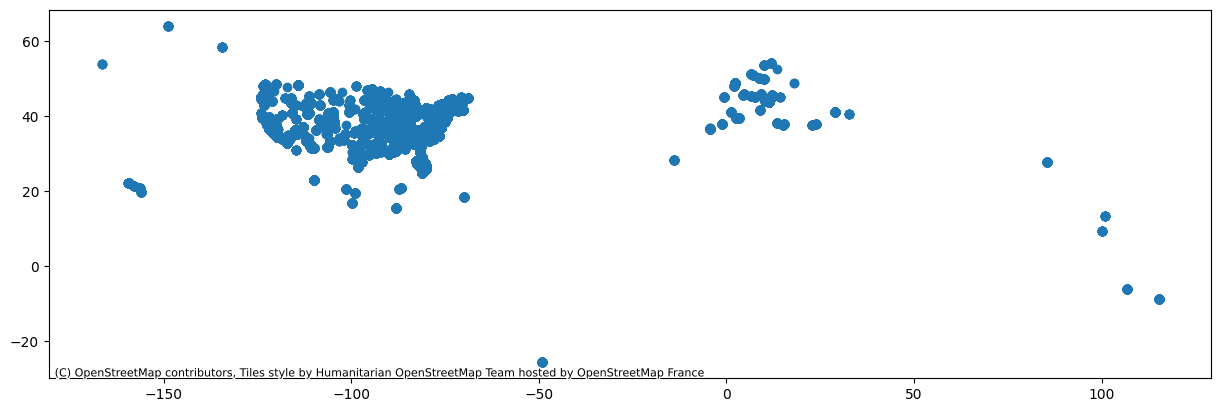

In [38]:
ax = gdf_hotels.plot(figsize=(15,10))

cx.add_basemap(
    ax, # the figure we created using our plot method
    crs=gdf_hotels.crs.to_string(), # we can pull the CRS out of the geodataframe!
    zoom=3 # zoom level
    )

,reviews.rating
geometry,
POINT EMPTY,4.555556
POINT (-49.28146 -25.43675),4.150943
POINT (-69.91005 18.45757),4.235294
POINT (-88.0379 15.49901),4.325000
POINT (-99.82723 16.79203),4.127273
...,...
POINT (85.35596 27.7216),8.355357
POINT (100.06518 9.48639),3.789474
POINT (100.98721 13.36845),3.000000


In [75]:
review_summaries = df_reduced.groupby(['latitude', 'longitude'])[['reviews.rating']].agg(['mean', 'count']).droplevel(0, axis=1).reset_index()
review_summaries = review_summaries[review_summaries['count']>10]
review_summaries

,latitude,longitude,mean,count
0,-25.436750,-49.281460,4.150943,53
1,-8.700062,115.164407,3.309091,55
2,-6.195424,106.823673,4.666667,51
3,9.486392,100.065182,3.789474,19
5,15.499006,-88.037895,4.325000,40
...,...,...,...,...
601,51.295746,6.557915,3.875000,48
603,53.566245,9.988144,3.918919,37
605,54.153300,11.754320,4.039216,51
606,58.299629,-134.405992,4.684211,19


In [76]:
review_summary_gdf = geopandas.GeoDataFrame(
    review_summaries, # Our pandas dataframe
    geometry = geopandas.points_from_xy(
        review_summaries['longitude'], # Our 'x' column (horizontal position of points)
        review_summaries['latitude'] # Our 'y' column (vertical position of points)
        ),
    crs = 'EPSG:4326' # the coordinate reference system of the data - use EPSG:4326 if you are unsure
    )

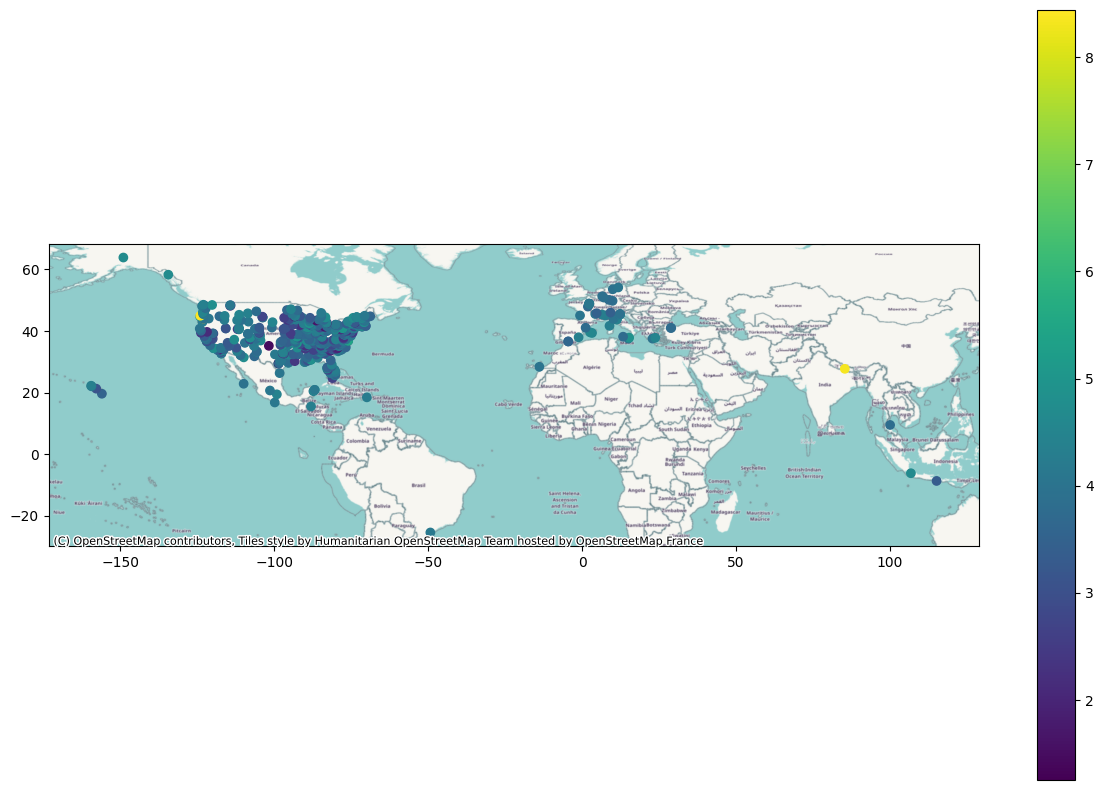

In [78]:
ax = review_summary_gdf.plot("mean", figsize=(15,10), legend=True)

cx.add_basemap(
    ax, # the figure we created using our plot method
    crs=review_summary_gdf.crs.to_string(), # we can pull the CRS out of the geodataframe!
    zoom=3 # zoom level
    )

In [148]:
df_reduced['reviews_stars'] = df_reduced["reviews.rating"].case_when([
    (df_reduced["reviews.rating"] == 1, "⭐"),
    (df_reduced["reviews.rating"] == 2, "⭐⭐"),
    (df_reduced["reviews.rating"] == 3, "⭐⭐⭐"),
    (df_reduced["reviews.rating"] == 4, "⭐⭐⭐⭐"),
    (df_reduced["reviews.rating"] == 5, "⭐⭐⭐⭐⭐")
])

In [149]:
from textwrap import fill as wrap_text

In [151]:
df_reduced['reviews.text']

0        Really lovely hotel. Stayed on the very top fl...
1        Ett mycket bra hotell. Det som drog ner betyge...
2        We stayed here for four nights in October. The...
3        We loved staying on the island of Lido! You ne...
4        Lovely view out onto the lagoon. Excellent vie...
                               ...                        
24402    We are extremely disappointed in this company....
24403    Our family of 14 stayed in a 5 bedroom cabin, ...
24404    We truly enjoyed staying at the Elk Springs re...
24405    We were here for a 2nd time the last weekend o...
24406    My husband and I stayed at Tree Tops which is ...
Name: reviews.text, Length: 24407, dtype: object

In [153]:
df_reduced['reviews.text'] = df_reduced['reviews.text'].apply(lambda x: wrap_text(x, 30))


AttributeError: 'float' object has no attribute 'expandtabs'